In [1]:
WORKING_DIR = 'D:/Assignments/dacon/TVControlHandGestureRecognition/' # 각자의 환경에 맞게 Working Directory 경로 수정
DATA_PATH = 'dataset/'
TRAIN_CSV = 'train.csv'

In [2]:
import os

if not os.path.isdir(WORKING_DIR):
    print('Working Directory를 입력하세요.')
    WORKING_DIR = input()

os.chdir(WORKING_DIR)
os.getcwd()

'D:\\Assignments\\dacon\\TVControlHandGestureRecognition'

In [3]:
import pandas as pd

train_df = pd.read_csv(os.path.join(DATA_PATH, TRAIN_CSV))
train_df.head()

,id,path,label
0,TRAIN_000,./train/TRAIN_000.mp4,3
1,TRAIN_001,./train/TRAIN_001.mp4,0
2,TRAIN_002,./train/TRAIN_002.mp4,1
3,TRAIN_003,./train/TRAIN_003.mp4,4
4,TRAIN_004,./train/TRAIN_004.mp4,4


# 데이터 불균형 확인

In [4]:
train_df.label.count()

610

In [5]:
train_df.label.value_counts()

3    133
1    129
2    121
4    114
0    113
Name: label, dtype: int64

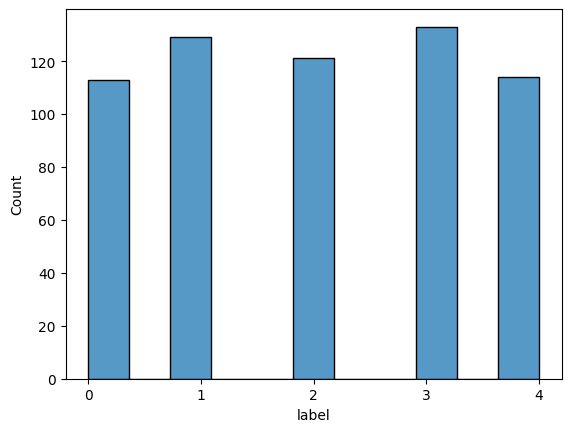

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(x='label',data=train_df,)
plt.xticks([i for i in range(5)])
plt.show()